In [0]:
import pandas as pd
import io
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt 

In [0]:
url = "https://drive.google.com/uc?export=view&id=1REng4UF8QsKR6Miiu-pHF9fAYj0uAtd6"
data = requests.get(url).content
ds = pd.read_csv(io.StringIO(data.decode('utf-8')))
print(ds)

    Province/State Country/Region      Lat  ...  3/20/20  3/21/20  3/22/20
0              NaN       Thailand  15.0000  ...      322      411      599
1              NaN          Japan  36.0000  ...      963     1007     1086
2              NaN      Singapore   1.2833  ...      385      432      455
3              NaN          Nepal  28.1667  ...        1        1        2
4              NaN       Malaysia   2.5000  ...     1030     1183     1306
..             ...            ...      ...  ...      ...      ...      ...
482            NaN       Dominica  15.4150  ...        0        0        1
483            NaN        Grenada  12.1165  ...        0        0        1
484            NaN     Mozambique -18.6657  ...        0        0        1
485            NaN          Syria  34.8021  ...        0        0        1
486            NaN    Timor-Leste  -8.8742  ...        0        0        1

[487 rows x 65 columns]


In [68]:
# print(len(ds)) ===>487
zero_dict={}
for column in ds.columns[4:]:
  count=0
  for i in range(len(ds)):
    # print(ds[column][i])
    if(ds[column][i]==0):
      count+=1
  zero_dict[column] = count/len(ds)
print(zero_dict)
print(len(zero_dict))
print(min(zero_dict.values()))

{'3/4/20': 0.6899383983572895, '3/5/20': 0.6652977412731006, '3/6/20': 0.6180698151950719, '3/7/20': 0.5708418891170431, '3/8/20': 0.5133470225872689, '3/9/20': 0.48459958932238195, '3/10/20': 0.6078028747433265, '3/11/20': 0.5790554414784395, '3/12/20': 0.5687885010266941, '3/13/20': 0.5318275154004107, '3/14/20': 0.49691991786447637, '3/15/20': 0.4784394250513347, '3/16/20': 0.46406570841889117, '3/17/20': 0.45585215605749485, '3/18/20': 0.4455852156057495, '3/19/20': 0.433264887063655, '3/20/20': 0.41478439425051333, '3/21/20': 0.40451745379876797, '3/22/20': 0.3942505133470226}
19
0.3942505133470226


In [70]:
dates=[]
for key, value in zero_dict.items():
  if(value > 0.60):
    dates.append(key)
print(dates)

['3/4/20', '3/5/20', '3/6/20', '3/10/20']


In [0]:
print("Before Removing")
print(ds)
# dropping passed columns
for key,value in zero_dict.items():
  if(value > 0.70):
    ds.drop([key], axis = 1, inplace = True)
print(ds)


Before Removing
    Province/State Country/Region      Lat  ...  3/20/20  3/21/20  3/22/20
0              NaN       Thailand  15.0000  ...      322      411      599
1              NaN          Japan  36.0000  ...      963     1007     1086
2              NaN      Singapore   1.2833  ...      385      432      455
3              NaN          Nepal  28.1667  ...        1        1        2
4              NaN       Malaysia   2.5000  ...     1030     1183     1306
..             ...            ...      ...  ...      ...      ...      ...
482            NaN       Dominica  15.4150  ...        0        0        1
483            NaN        Grenada  12.1165  ...        0        0        1
484            NaN     Mozambique -18.6657  ...        0        0        1
485            NaN          Syria  34.8021  ...        0        0        1
486            NaN    Timor-Leste  -8.8742  ...        0        0        1

[487 rows x 64 columns]
    Province/State Country/Region      Lat  ...  3/20/20  3

In [62]:
import copy
## date =3/12/20
countries={}
for ind in ds.index: 
  # print(ds['Country/Region'][ind],ds['3/12/20'][ind])
  country = ds['Country/Region'][ind]
  cases = ds['3/12/20'][ind]  #on date =3/12/20
  countries[country] = countries.get(country, 0) + cases

c=copy.deepcopy(countries)
for key,value in c.items():
  if value<1000:
    del countries[key]

print(countries)

{'Germany': 2078, 'Italy': 12462, 'Spain': 2277, 'US': 1663, 'China': 80932, 'Iran': 10075, 'Korea, South': 7869, 'France': 2290}


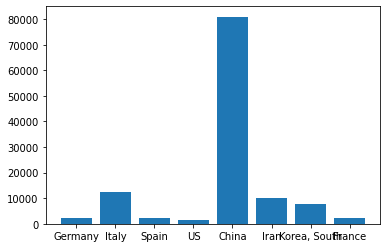

<Figure size 432x288 with 0 Axes>

In [64]:
plt.bar(range(len(countries)), list(countries.values()), align='center')
plt.xticks(range(len(countries)), list(countries.keys()))
# function to show the plot 
plt.show()
plt.savefig('countries.png')

In [71]:
date_cases={}
for date in dates:
  for ind in ds.index:
    cases = ds[date][ind]  #on date =3/12/20
    date_cases[date] = date_cases.get(date, 0) + cases
print(date_cases)

{'3/4/20': 95120, '3/5/20': 97882, '3/6/20': 101784, '3/10/20': 118592}


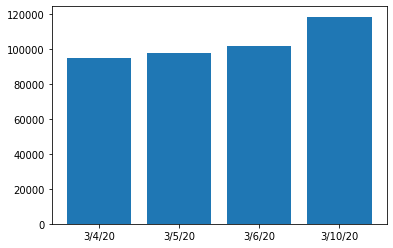

<Figure size 432x288 with 0 Axes>

In [72]:
plt.bar(range(len(date_cases)), list(date_cases.values()), align='center')
plt.xticks(range(len(date_cases)), list(date_cases.keys()))
# function to show the plot 
plt.show()
plt.savefig('dates.png')

In [75]:
!pip install pycountry_convert
import pycountry_convert as pc

     |████████████████████████████████| 10.0MB 4.3MB/s 
     |████████████████████████████████| 235kB 48.2MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=5c075e26fdbd1d9ccfb09e44f3b396789b96950f181a2dbb834d8a5932037ab3
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.0.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.0.4 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [96]:
#3/10/20

countries={}
continents={}
for ind in ds.index: 
  # print(ds['Country/Region'][ind],ds['3/10/20'][ind])
  country = ds['Country/Region'][ind]
  cases = ds['3/12/20'][ind]  #on date =3/10/20
  countries[country] = countries.get(country, 0) + cases

print(countries)
def country_to_continent(country_name):
    # print(country_name)
    try:
      country_alpha2 = pc.country_name_to_country_alpha2(country_name)
      country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
      country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
      return country_continent_name
    except Exception:
      pass

for country in countries.keys():
  continent =country_to_continent(country)
  continents[continent] = continents.get(continent, 0) + countries[country]
print(continents)

del continents['Oceania']
del continents[None]

{'Thailand': 70, 'Japan': 639, 'Singapore': 178, 'Nepal': 1, 'Malaysia': 149, 'Canada': 117, 'Australia': 128, 'Cambodia': 3, 'Sri Lanka': 2, 'Germany': 2078, 'Finland': 59, 'United Arab Emirates': 85, 'Philippines': 52, 'India': 73, 'Italy': 12462, 'Sweden': 599, 'Spain': 2277, 'Belgium': 314, 'Egypt': 67, 'Lebanon': 61, 'Iraq': 71, 'Oman': 18, 'Afghanistan': 7, 'Bahrain': 195, 'Kuwait': 80, 'Algeria': 24, 'Croatia': 19, 'Switzerland': 652, 'Austria': 302, 'Israel': 131, 'Pakistan': 20, 'Brazil': 52, 'Georgia': 24, 'Greece': 99, 'North Macedonia': 7, 'Norway': 702, 'Romania': 49, 'Estonia': 16, 'San Marino': 69, 'Belarus': 12, 'Iceland': 103, 'Lithuania': 3, 'Mexico': 12, 'New Zealand': 5, 'Nigeria': 2, 'Ireland': 43, 'Luxembourg': 19, 'Monaco': 2, 'Qatar': 262, 'Ecuador': 17, 'Azerbaijan': 11, 'Armenia': 4, 'Dominican Republic': 5, 'Indonesia': 34, 'Portugal': 59, 'Andorra': 1, 'Latvia': 10, 'Morocco': 6, 'Saudi Arabia': 45, 'Senegal': 4, 'Argentina': 19, 'Chile': 23, 'Jordan': 1, 'U

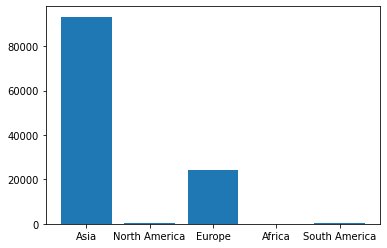

<Figure size 432x288 with 0 Axes>

In [97]:
plt.bar(range(len(continents)), list(continents.values()), align='center')
plt.xticks(range(len(continents)), list(continents.keys()))
# function to show the plot 
plt.show()
plt.savefig('continents.png')